In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_cltv = pd.read_csv('.\..\cleaned_data.csv',index_col=0)
customer_cltv.head()

,CustomerID,pfw_spent,fw_nb_orders,fw_nb_items,fw_total_spent,fw_used_coupon,first_order_month,fw_purchased_accessory,first_item_size,accepts_marketing,wealthy_zip,region,first_item_price_range
0,Anonymous13455,1257.80,1,1,50.0,0,6,0,M,0,0,MW,high
1,Anonymous2142,436.15,1,1,48.0,0,5,0,L,0,0,NE,high
2,Anonymous4843,1052.75,2,2,96.0,0,10,0,S,1,0,W,high
3,Anonymous11225,728.10,1,1,16.0,0,1,1,No size,0,0,MW,low
4,Anonymous540,1114.75,1,1,50.0,0,1,0,XS,0,0,W,high


## Preprocessing: 

In [3]:
dummies_encoded = pd.get_dummies(customer_cltv[['first_item_size','region','first_item_price_range']],drop_first=True)
customer_cltv = pd.concat([customer_cltv,dummies_encoded], axis =1)

In [4]:
customer_cltv.head(2)
customer_cltv = customer_cltv[customer_cltv.loc[:,'fw_total_spent'] > 0]

In [5]:
customer_cltv.drop(columns=['first_item_size','region','first_item_price_range'],inplace = True)

## Simple Linear Regression:

In [ ]:
X = customer_cltv[['']]
y = customer_cltv[['pfw_spent']]

## Multiple Linear Regression

In [6]:
## We create our train_test split variables and look at the shape. 
X = customer_cltv.drop(columns=['CustomerID','pfw_spent'])
y = customer_cltv[['pfw_spent']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7942, 18) (7942, 1)
(2648, 18) (2648, 1)


,fw_nb_orders,fw_nb_items,fw_total_spent,fw_used_coupon,first_order_month,fw_purchased_accessory,accepts_marketing,wealthy_zip,first_item_size_M,first_item_size_No size,first_item_size_S,first_item_size_XL,first_item_size_XS,region_NE,region_S,region_W,first_item_price_range_low,first_item_price_range_medium
0,1,1,50.0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,48.0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,2,96.0,0,10,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,1,16.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,1,50.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10590,1,1,50.0,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0
10591,1,1,50.0,0,12,0,0,1,1,0,0,0,0,0,1,0,0,0
10592,1,1,50.0,0,6,0,0,0,1,0,0,0,0,0,0,1,0,0
10593,1,2,90.0,1,12,0,0,0,0,0,0,1,0,0,0,1,0,0


In [7]:
## We instantiate the linear Regression model and fit to the training data. 
from sklearn.linear_model import LinearRegression
rModel = linear_model.LinearRegression(normalize = True)
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [12]:
## We check R squared. 
print(rModel.score(X_train,y_train))

0.0416431512765596


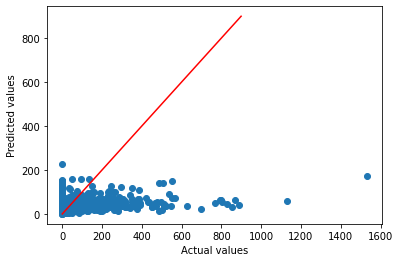

In [15]:
y_pred = rModel.predict(X_test)
## We visualize the Actual values vs the predicted values. 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([x for x in range(0,900)],[x for x in range(0,900)], color='r')
plt.show()